In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

In [2]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
# read the dataset 
df = pd.read_csv('news.csv')

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## Data preprocessing and feature extraction 

In [5]:
# Removing the first column as it doesn't have effect on the results 
df.drop(df.columns[0],axis = 1,inplace = True)

In [6]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#### Removing the tile as it doens't affect the text 

In [7]:
df.drop(["title"],axis=1,inplace = True)

In [8]:
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [9]:
df.shape

(6335, 2)

In [10]:
df.describe()

,text,label
count,6335,6335
unique,6060,2
top,"Killing Obama administration rules, dismantlin...",REAL
freq,58,3171


In [11]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True )

In [12]:
df.describe()

,text,label
count,6060,6060
unique,6060,2
top,In the wake of the recent acquittal of the Bun...,FAKE
freq,1,3071


In [13]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [14]:
df.tail()

,text,label
6055,The State Department told the Republican Natio...,REAL
6056,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6057,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6058,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6059,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [15]:
# convert text data to lowercase
df['text'] = df['text'].apply(lambda x: x.lower())
df.head()

,text,label
0,"daniel greenfield, a shillman journalism fello...",FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,u.s. secretary of state john f. kerry said mon...,REAL
3,"— kaydee king (@kaydeeking) november 9, 2016 t...",FAKE
4,it's primary day in new york and front-runners...,REAL


In [16]:
# remove commas and brackets  
import string 
def removeCommas(text) :
    sentences = [char for char in text if char not in string.punctuation]
    new_text = ''.join(sentences)
    return new_text

In [17]:
df['text'] = df['text'].apply(removeCommas)

In [18]:
df.head()

,text,label
0,daniel greenfield a shillman journalism fellow...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,us secretary of state john f kerry said monday...,REAL
3,— kaydee king kaydeeking november 9 2016 the l...,FAKE
4,its primary day in new york and frontrunners h...,REAL


In [19]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopping_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asoli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df['text']= df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopping_words)]))

In [21]:
df.head()

,text,label
0,daniel greenfield shillman journalism fellow f...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,us secretary state john f kerry said monday st...,REAL
3,— kaydee king kaydeeking november 9 2016 lesso...,FAKE
4,primary day new york frontrunners hillary clin...,REAL


### Explore the data with visualizations 

label
FAKE    3071
REAL    2989
Name: text, dtype: int64


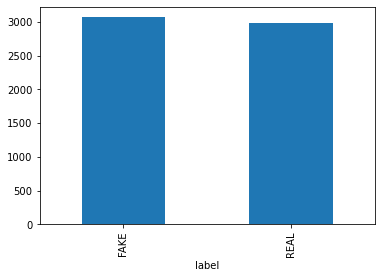

In [22]:
# count the real and fake data 
print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

In [23]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

In [24]:
# count the most frequent words 
def stringfrequency(text, column_text, quantity):
    sentences = ' '.join([text for text in text[column_text]])
    token_word = token_space.tokenize(sentences)
    frequency = nltk.FreqDist(token_word)
    df_frequencies = pd.DataFrame({"Word": list(frequency.keys()),"Frequency": list(frequency.values())})
    df_frequencies = df_frequencies.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencies, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

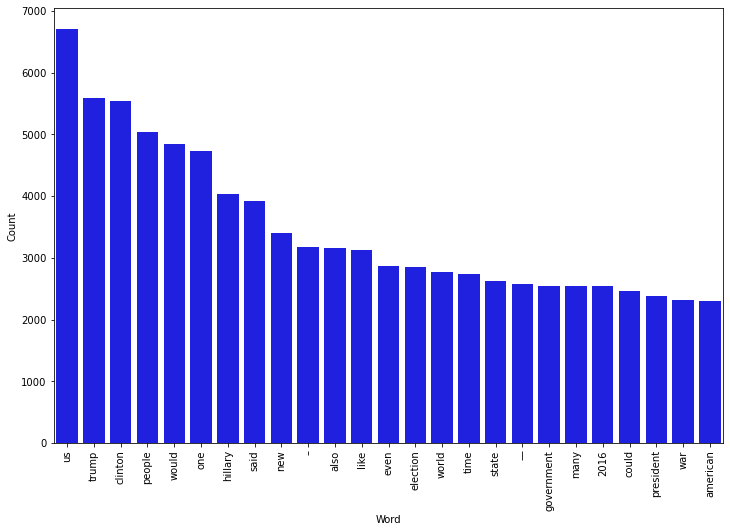

In [25]:
stringfrequency(df[df["label"] == "FAKE"], "text", 25)

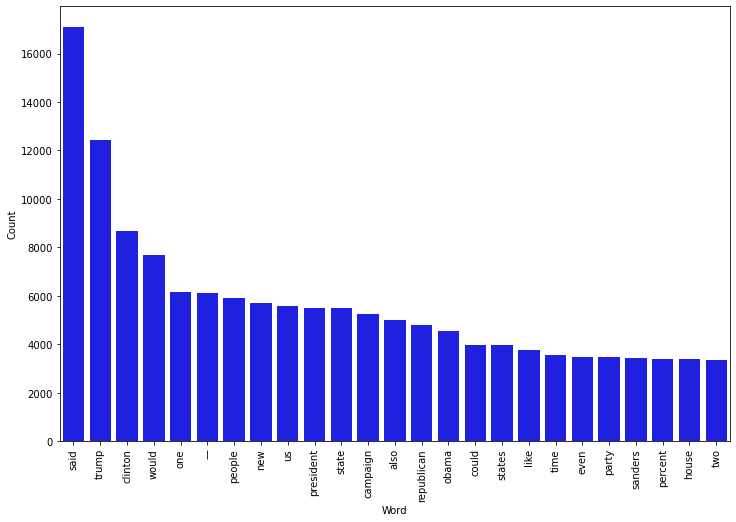

In [26]:
stringfrequency(df[df["label"] == "REAL"], "text", 25)

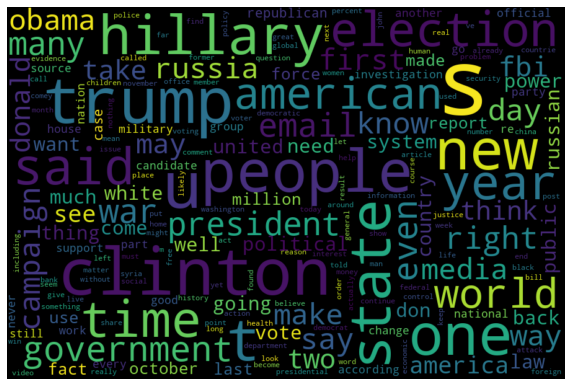

In [27]:
# count the most frequent words using wordcloud

from wordcloud import WordCloud

fake_topics = df[df["label"] == "FAKE"]
strings = ' '.join([text for text in fake_topics.text])

wordcloud = WordCloud(width= 900, height= 600, max_font_size = 150, collocations = False).generate(strings)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

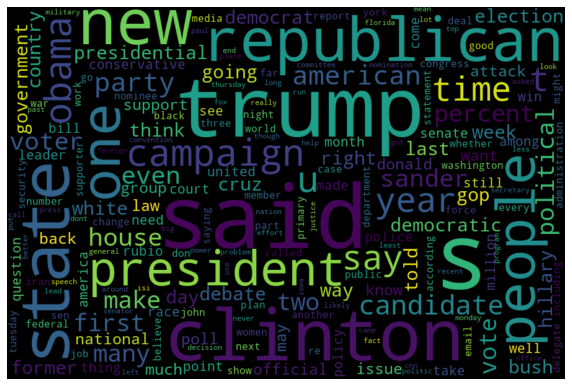

In [28]:

from wordcloud import WordCloud

Real_topics = df[df["label"] == "REAL"]
strings = ' '.join([text for text in Real_topics.text])

wordcloud = WordCloud(width= 900, height= 600,max_font_size = 150,collocations = False).generate(strings)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Data prepration  (Train and test split) 

In [29]:
X_train,X_test,y_train,y_test = train_test_split(df['text'], df.label, test_size=0.2, random_state = 42)

In [30]:
dctionary = dict()

## Detect the fake news using Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LogisticRegression())])

model = pipe.fit(X_train, y_train)

In [32]:
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dctionary['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 90.43%


##  visualize the results

In [33]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction)

[Text(0, 0.5, 'Fake'), Text(0, 1.5, 'Real')]

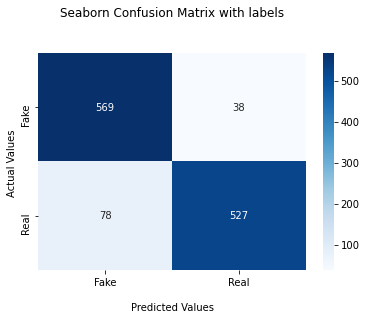

In [34]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['Fake','Real'])
ax.yaxis.set_ticklabels(['Fake','Real'])

## Detect the fake news using SVM

In [35]:
from sklearn import svm

# using linear svm 
clf = svm.SVC(kernel='linear') 

pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

In [36]:
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dctionary['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 93.32%


##  visualize the results 

In [37]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction)

[Text(0, 0.5, 'Fake'), Text(0, 1.5, 'Real')]

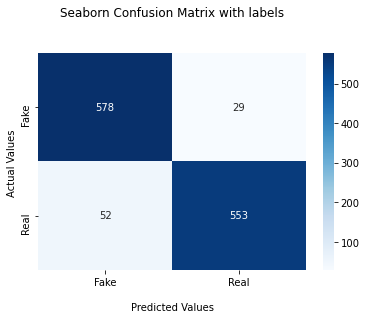

In [38]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['Fake','Real'])
ax.yaxis.set_ticklabels(['Fake','Real'])

## SVM VS Logistic regression 

([<matplotlib.axis.YTick at 0x28a04357f40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

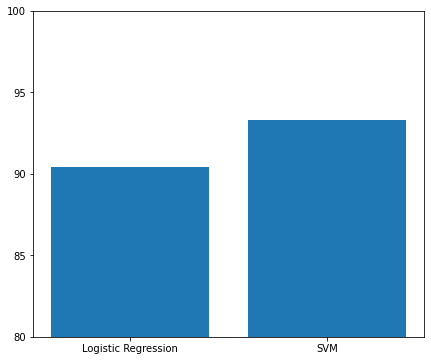

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.bar(list(dctionary.keys()),list(dctionary.values()))
plt.ylim(80,100)
plt.yticks((80,85, 90, 95, 100))